## **Gru + Word Embedding**

---

Dataset tweet berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


## 1. Persiapan Dataset

In [3]:
import pandas as pd

# Path ke file dataset
train_dataset_path = '..\Dataset\Training\Clean_train_data_fulllimit.csv'

# Membaca dataset
train_df = pd.read_csv(train_dataset_path, sep=',', header=None, usecols=[1,2], skiprows=1)
train_df.columns = ['tweet', 'label']

# Tampilkan 10 baris pertama dataset
print(train_df.head(10))


                                               tweet  label
0                    ['pagi', 'di', 'buat', 'emosi']  Anger
1  ['kok', 'stabilitas', 'negara', 'memange', 'ta...  Anger
2          ['lah', 'emosi', 'terus', 'liat', 'emyu']  Anger
3  ['aib', 'bodoh', 'benar', 'kata', 'aib', 'munc...  Anger
4                  ['dih', 'kamu', 'sebal', 'bodoh']  Anger
5  ['asli', 'malu', 'maluin', 'orang', 'indo', 't...  Anger
6                          ['drama', 'abg', 'tolol']  Anger
7  ['emosi', 'sih', 'sama', 'katla', 'kemarin', '...  Anger
8  ['bangsat', 'tribute', 'bencana', 'mau', 'ngal...  Anger
9  ['pergi', 'jauh', 'terus', 'teriak', 'nang', '...  Anger


## 2. Preprocessing Data

In [4]:
import ast

# Mengubah label menjadi indeks numerik
def get_label_idx(label):
    if label == 'Anger':
        return 0
    if label == 'Joy':
        return 1
    if label == 'Fear':
        return 2
    if label == "Love":
        return 3
    if label == "Sad":
        return 4
    if label == "Neutral":
        return 5

train_df['label'] = train_df['label'].apply(get_label_idx)

# Fungsi untuk menggabungkan teks yang telah diproses
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

train_df["preprocessed"] = train_df["tweet"].apply(join_text_list)
print(train_df["preprocessed"].head())


0                                   pagi di buat emosi
1    kok stabilitas negara memange tahun negara ama...
2                            lah emosi terus liat emyu
3    aib bodoh benar kata aib muncul lebih sudah ti...
4                                 dih kamu sebal bodoh
Name: preprocessed, dtype: object


## 3. Tokenisasi

In [5]:
import numpy as np
import tensorflow as tf

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

# Membuat embedding_matrix contoh
embedding_matrix = np.random.rand(vocab_size, embedding_dim)


## 4. Word Embedding

Padding

In [6]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data pelatihan dan data validasi
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate word index dictionary untuk kalimat-kalimat pelatihan
tokenizer.fit_on_texts(train_df['preprocessed'])
word_index = tokenizer.word_index
print(word_index)

# Convert kalimat-kalimat pelatihan menjadi urutan kata
train_sequences = tokenizer.texts_to_sequences(train_df['preprocessed'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Convert kalimat-kalimat validasi menjadi urutan kata
valid_sequences = tokenizer.texts_to_sequences(valid_df['preprocessed'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)



{'<OOV>': 1, 'kamu': 2, 'kalau': 3, 'sama': 4, 'jadi': 5, 'iya': 6, 'orang': 7, 'sekali': 8, 'tidak': 9, 'suka': 10, 'mau': 11, 'apa': 12, 'saya': 13, 'buat': 14, 'yang': 15, 'rasa': 16, 'ada': 17, 'terus': 18, 'takut': 19, 'nya': 20, 'username': 21, 'sangat': 22, 'baik': 23, 'tahu': 24, 'banyak': 25, 'jangan': 26, 'lebih': 27, 'cinta': 28, 'sedih': 29, 'waktu': 30, 'benar': 31, 'bisa': 32, 'hari': 33, 'belum': 34, 'sayang': 35, 'semua': 36, 'di': 37, 'memang': 38, 'sudah': 39, 'sih': 40, 'bukan': 41, 'anak': 42, 'selalu': 43, 'tak': 44, 'pak': 45, 'pakai': 46, 'kasih': 47, 'biasa': 48, 'baru': 49, 'moga': 50, 'kan': 51, 'semangat': 52, 'tertawa': 53, 'sekarang': 54, 'sendiri': 55, 'teman': 56, 'salah': 57, 'kok': 58, 'bikin': 59, 'punya': 60, 'pernah': 61, 'diri': 62, 'hati': 63, 'satu': 64, 'lama': 65, 'enak': 66, 'pagi': 67, 'kata': 68, 'mana': 69, 'si': 70, 'marah': 71, 'jalan': 72, 'selamat': 73, 'tetap': 74, 'lihat': 75, 'hidup': 76, 'kerja': 77, 'malah': 78, 'ku': 79, 'padahal':

Memuat Word Embedding

In [7]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in train_df['preprocessed']]
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=5, workers=4)

Membuat Matriks

In [8]:
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

Membuat Matriks Embedding

In [9]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[1000])
print(word)

('jaya', array([-0.40115172, -0.66651291,  0.42705306,  0.62495875,  0.62054902,
       -0.67437661,  1.27887511,  0.38053018]))


## 5. Build and Compile Model

Referensi : https://github.com/janerjzou/sentiment_analysis_with_Bi-LSTM/blob/main/sentiment_analysis_with_Bi-LSTM.ipynb

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    Bidirectional(GRU(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(GRU(32)),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


## 6. Pelatihan Model

In [11]:
num_epochs = 10

history = model.fit(train_padded, train_df['label'], epochs=num_epochs, validation_data=(valid_padded, valid_df['label']), verbose=1)


Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 71s 116ms/step - accuracy: 0.3094 - loss: 1.6485 - val_accuracy: 0.5524 - val_loss: 1.2155
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 55s 112ms/step - accuracy: 0.6518 - loss: 1.0073 - val_accuracy: 0.5798 - val_loss: 1.1889
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 54s 111ms/step - accuracy: 0.7537 - loss: 0.7597 - val_accuracy: 0.5953 - val_loss: 1.2359
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.8220 - loss: 0.5845 - val_accuracy: 0.5726 - val_loss: 1.3595
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 55s 113ms/step - accuracy: 0.8582 - loss: 0.4623 - val_accuracy: 0.5672 - val_loss: 1.4730
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 55s 112ms/step - accuracy: 0.8897 - loss: 0.3718 - val_accuracy: 0.5677 - val_loss: 1.6119
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 56s 114ms/step - accuracy: 0.9049 - loss: 0.3187 - val_accuracy: 0.5739 - val_loss: 1.7461
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 60s 122ms/step - accuracy: 0.9302 - loss: 0

## 7. Evaluasi Model

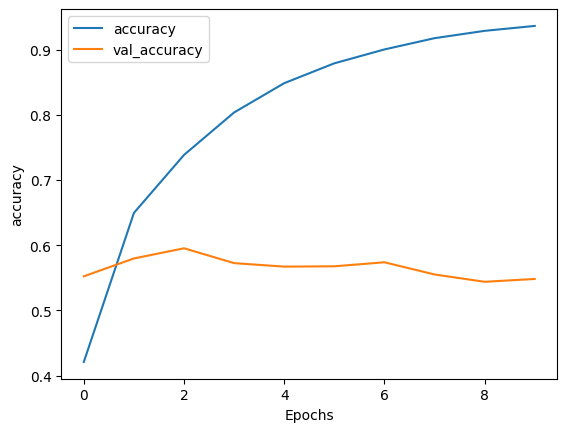

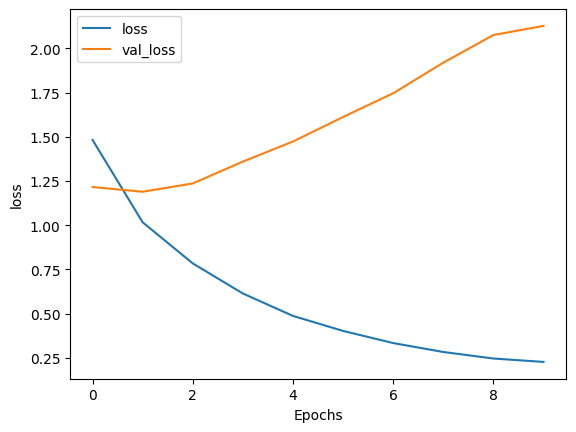

In [12]:
import matplotlib.pyplot as plt

# Fungsi untuk plot grafik training history
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot grafik akurasi dan loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")



In [13]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(valid_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

print (y_pred_classes.shape)
print (y_pred.shape)

# Mencetak classification report
print(classification_report(valid_df["label"], y_pred_classes))

123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step
(3912,)
(3912, 6)
              precision    recall  f1-score   support

           0       0.59      0.69      0.63       674
           1       0.54      0.60      0.57       882
           2       0.59      0.60      0.59       645
           3       0.52      0.43      0.47       618
           4       0.57      0.56      0.57       678
           5       0.39      0.29      0.33       415

    accuracy                           0.55      3912
   macro avg       0.53      0.53      0.53      3912
weighted avg       0.54      0.55      0.54      3912



## 7. Testing

In [14]:
tweets = [
    "Saya merasa sangat cemas tentang ujian besok",
    "Baru saja mendapatkan promosi di kantor! Sangat bahagia",
    "Saya suka menghabiskan waktu bersama keluarga di akhir pekan",
    "Merasa sedih hari ini, semuanya terasa sulit",
    "Hanya hari biasa tidak ada yang istimewa",
    "Saya sangat frustrasi dengan kemacetan hari ini!",
    "Pikiran untuk berbicara di depan umum selalu membuat saya takut.",
    "Bersenang-senang di pantai hari ini, sangat menyenangkan!",
    "Anjing saya adalah teman terbaik yang pernah saya miliki.",
    "Dompet saya hilang hari ini, merasa sangat sedih.",
    "Ini hanya hari Senin biasa, kembali bekerja.",
    "Saya tidak percaya betapa kasarnya beberapa orang!",
    "Berjalan sendirian di malam hari membuat saya sangat tidak nyaman.",
    "Makan malam terbaik bersama teman-teman, sangat banyak tawa!",
    "Tidak ada yang mengalahkan perasaan jatuh cinta.",
    "Ini hari hujan, membuat saya merasa sedikit muram.",
    "Tidak banyak yang terjadi hari ini, cukup tidak berkesan.",
    "Saya sangat marah dengan perlakuan tidak adil di tempat kerja!",
    "Film horor itu benar-benar menakutkan!",
    "Lulus hari ini, tidak bisa menggambarkan kebahagiaan!"
]

# Fungsi untuk mendapatkan label dari prediksi
def get_label(predict):
    if predict == 0:
        return 'anger'
    if predict == 1:
        return 'joy'
    if predict == 2:
        return 'fear'
    if predict == 3:
        return 'love'
    if predict == 4:
        return 'sad'
    if predict == 5:
        return 'neutral'

# Preprocess the tweets
max_length = 100  # Sesuaikan dengan panjang maksimum yang digunakan selama pelatihan
trunc_type = 'post'

# Tokenize and pad sequences
sample_seqs = tokenizer.texts_to_sequences(tweets)
sample_padded = pad_sequences(sample_seqs, maxlen=max_length, truncating=trunc_type)

# Predict labels for each tweet
predictions = model.predict(sample_padded)

# Print predictions and corresponding labels
for i, tweet in enumerate(tweets):
    prediction = np.argmax(predictions[i])
    label = get_label(prediction)
    print(f"Tweet: {tweet}\nPredicted label: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Tweet: Saya merasa sangat cemas tentang ujian besok
Predicted label: joy

Tweet: Baru saja mendapatkan promosi di kantor! Sangat bahagia
Predicted label: joy

Tweet: Saya suka menghabiskan waktu bersama keluarga di akhir pekan
Predicted label: joy

Tweet: Merasa sedih hari ini, semuanya terasa sulit
Predicted label: sad

Tweet: Hanya hari biasa tidak ada yang istimewa
Predicted label: neutral

Tweet: Saya sangat frustrasi dengan kemacetan hari ini!
Predicted label: fear

Tweet: Pikiran untuk berbicara di depan umum selalu membuat saya takut.
Predicted label: fear

Tweet: Bersenang-senang di pantai hari ini, sangat menyenangkan!
Predicted label: joy

Tweet: Anjing saya adalah teman terbaik yang pernah saya miliki.
Predicted label: fear

Tweet: Dompet saya hilang hari ini, merasa sangat sedih.
Predicted label: sad

Tweet: Ini hanya hari Senin biasa, kembali bekerja.
Predicted label: anger

Tweet: Saya tidak percaya betapa kasarnya beberapa orang!
Pre